In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

In [11]:
style.use('seaborn-talk')
krfont = {'family':'NanumGothic', 'weight':'bold','size':10}
matplotlib.rc('font', **krfont)
#matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
class Perceptron():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=10):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update!=0.0)
            self.errors_.append(errors)
            print(self.w_)
        
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.net_input(X) > self.thresholds, 1, -1)

In [4]:
df = pd.read_csv('iris.csv', header=None)
df.shape

(150, 5)

In [5]:
y = df.iloc[:100, 4].values
y = np.where(y=='Iris-setosa',-1,1)
X = df.iloc[:100, [0,2]].values

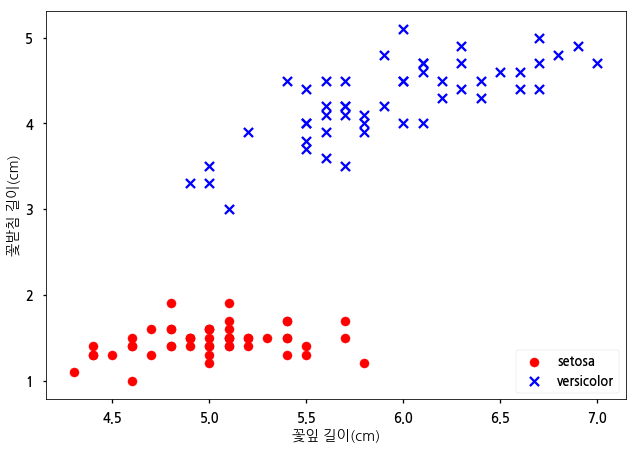

[0.2  1.4  0.94]
[0.   0.8  1.32]
[-0.2  0.2  1.7]
[-0.2   0.32  2.12]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[-0.4  -0.7   1.84]
[1, 3, 3, 2, 1, 0, 0, 0, 0, 0]


In [14]:
plt.scatter(X[:50,0], X[:50,1], color='r', marker='o', label='setosa')
plt.scatter(X[50:,0], X[50:,1], color='b', marker='x', label='versicolor')
plt.legend(loc=4)
plt.xlabel('꽃잎 길이(cm)')
plt.ylabel('꽃받침 길이(cm)')
plt.show()

ppn1 = Perceptron(eta=0.1)
ppn1.fit(X,y)
print(ppn1.errors_)